In [1]:
import nibabel as nib #pip install nibabel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path as op
# Useful imports to define the direct download function below
import requests
import urllib.request
from tqdm import tqdm
import os
from scipy.stats import zscore
from nilearn import datasets
from nilearn.input_data import NiftiMasker
from nilearn.plotting import plot_stat_map
from sklearn.decomposition import PCA, FastICA

%matplotlib inline

/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


https://openneuro.org/datasets/ds002322/versions/1.0.4  (alice)

https://openneuro.org/datasets/ds002739/versions/1.0.0  (autre)

In [2]:
def mkdir_no_exist(path):
    if not op.isdir(path):
        os.makedirs(path)
        
class DownloadProgressBar(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)


def download_url(url, output_path):
    with DownloadProgressBar(unit='B', unit_scale=True,
                             miniters=1, desc=url.split('/')[-1]) as t:
        urllib.request.urlretrieve(url, filename=output_path, reporthook=t.update_to)

# def direct_file_download_open_neuro(file_list, file_types, dataset_id, dataset_version, save_dirs):
def direct_file_download_open_neuro(sub_id, sub_id_number, dataset_id, dataset_version, subject_fmap):
    path = os. getcwd()
    subject = 'sub-'+sub_id_number
    # https://openneuro.org/crn/datasets/ds004226/snapshots/1.0.0/files/sub-001:sub-001_scans.tsv
    func_path = op.join(path, 'sub_'+subject_fmap, 'func')
    mkdir_no_exist(op.join(path, 'sub_'+subject_fmap))
    mkdir_no_exist(func_path)
    file_func = f'sub-{sub_id_number}_task-alice_bold.nii.gz'

    anat_path = op.join(path, 'sub_'+subject_fmap, 'anat')
    mkdir_no_exist(op.join(path, 'sub_'+subject_fmap))
    mkdir_no_exist(anat_path)
    file_anat = f'sub-{sub_id_number}_T1w.nii.gz'
    
    derivative_path = op.join(path, 'sub_'+subject_fmap, 'derivative')
    mkdir_no_exist(op.join(path, 'sub_'+subject_fmap))
    mkdir_no_exist(derivative_path)
    file_derivative = f'sub-{sub_id_number}_task-alice_bold_preprocessed.nii.gz'
    
    download_link = 'https://openneuro.org/crn/datasets/{}/snapshots/{}/files/{}:{}:{}'.format(dataset_id, dataset_version, subject, 'func', file_func)
    print('Attempting download from ', download_link)
    download_url(download_link, op.join(func_path, file_func))
    print('Ok')
    
    download_link = 'https://openneuro.org/crn/datasets/{}/snapshots/{}/files/{}:{}:{}'.format(dataset_id, dataset_version, subject, 'anat', file_anat)
    print('Attempting download from ', download_link)
    download_url(download_link, op.join(anat_path, file_anat))
    print('Ok')
    
    download_link = 'https://openneuro.org/crn/datasets/{}/snapshots/{}/files/{}:{}:{}'.format(dataset_id, dataset_version, 'derivatives',subject, file_derivative)
    print('Attempting download from ', download_link)
    download_url(download_link, op.join(derivative_path, file_derivative))
    print('Ok')


In [4]:

dataset_fmap = 'ds002322'
subject_fmap = ('18','22','35')

# Download one subject's data from each dataset
for i in subject_fmap:
    name='sub-'+i
    print(name)
    direct_file_download_open_neuro(sub_id = name, 
                                    sub_id_number = i,
                                    dataset_id = dataset_fmap,
                                    dataset_version='1.0.0',
                                    subject_fmap = i)

    # direct_file_download_open_neuro(file_list=['sub-001_task-sitrep_run-04_events.tsv'], 
    #                                 file_types=['func'], 
    #                                 dataset_id=dataset_fmap, 
    #                                 dataset_version='1.0.0', 
    #                                 save_dirs=[func_path])

sub-18
Attempting download from  https://openneuro.org/crn/datasets/ds002322/snapshots/1.0.0/files/sub-18:func:sub-18_task-alice_bold.nii.gz


sub-18:func:sub-18_task-alice_bold.nii.gz: 0.00B [00:00, ?B/s]

sub-18:func:sub-18_task-alice_bold.nii.gz: 105MB [00:12, 8.39MB/s]                              


Ok
Attempting download from  https://openneuro.org/crn/datasets/ds002322/snapshots/1.0.0/files/sub-18:anat:sub-18_T1w.nii.gz


sub-18:anat:sub-18_T1w.nii.gz: 10.1MB [00:02, 4.21MB/s]                            


Ok
Attempting download from  https://openneuro.org/crn/datasets/ds002322/snapshots/1.0.0/files/derivatives:sub-18:sub-18_task-alice_bold_preprocessed.nii.gz


derivatives:sub-18:sub-18_task-alice_bold_preprocessed.nii.gz: 287MB [03:42, 1.29MB/s]                              


Ok
sub-22
Attempting download from  https://openneuro.org/crn/datasets/ds002322/snapshots/1.0.0/files/sub-22:func:sub-22_task-alice_bold.nii.gz


sub-22:func:sub-22_task-alice_bold.nii.gz: 108MB [00:15, 6.85MB/s]                              


Ok
Attempting download from  https://openneuro.org/crn/datasets/ds002322/snapshots/1.0.0/files/sub-22:anat:sub-22_T1w.nii.gz


sub-22:anat:sub-22_T1w.nii.gz: 9.82MB [00:03, 2.98MB/s]                            


Ok
Attempting download from  https://openneuro.org/crn/datasets/ds002322/snapshots/1.0.0/files/derivatives:sub-22:sub-22_task-alice_bold_preprocessed.nii.gz


derivatives:sub-22:sub-22_task-alice_bold_preprocessed.nii.gz: 289MB [00:41, 7.02MB/s]                              


Ok
sub-35
Attempting download from  https://openneuro.org/crn/datasets/ds002322/snapshots/1.0.0/files/sub-35:func:sub-35_task-alice_bold.nii.gz


sub-35:func:sub-35_task-alice_bold.nii.gz: 110MB [00:14, 7.45MB/s]                              


Ok
Attempting download from  https://openneuro.org/crn/datasets/ds002322/snapshots/1.0.0/files/sub-35:anat:sub-35_T1w.nii.gz


sub-35:anat:sub-35_T1w.nii.gz: 10.6MB [00:02, 4.23MB/s]                            


Ok
Attempting download from  https://openneuro.org/crn/datasets/ds002322/snapshots/1.0.0/files/derivatives:sub-35:sub-35_task-alice_bold_preprocessed.nii.gz


derivatives:sub-35:sub-35_task-alice_bold_preprocessed.nii.gz: 291MB [00:47, 6.08MB/s]                              

Ok


### Load the data


In [5]:
current_directory = os.getcwd()
individual = '18'
img = nib.load(current_directory + '/sub_'+individual +'/derivative/sub-'+individual+'_task-alice_bold_preprocessed.nii.gz')
data = np.asanyarray(img.dataobj)
print(data.shape)

(79, 95, 68, 372)


### Preprocess the data

In [6]:
vol_shape = data.shape[:-1]
n_vols = data.shape[-1]
print(vol_shape, n_vols)

(79, 95, 68) 372


In [7]:
N = np.prod(vol_shape)
#we take the full matrux as time series
data_ = data.reshape(N, n_vols).T
#reshape in function of the time axis and take the transpose
print(data_.shape)

(372, 510340)


In [8]:
#to get the PCA need the row means in a times_axis_shape x N
row_means = np.mean(data_, axis=1)
row_means = np.outer(row_means, np.ones(N))
#substract the mean from the time axis
X = data_ - row_means

print("Mean of means left after centering: ", np.mean(np.mean(X, axis=1)))

Mean of means left after centering:  -9.983021225057745e-16


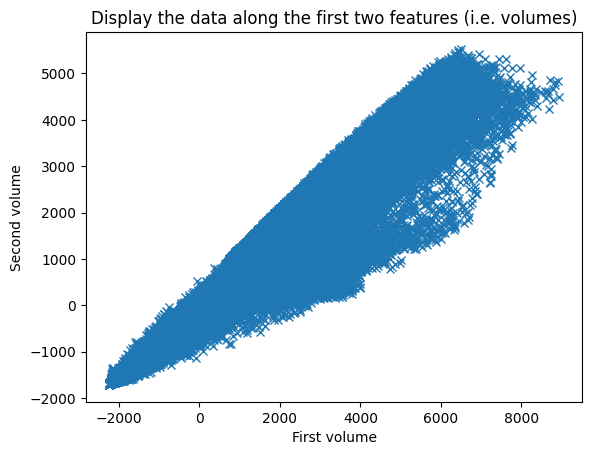

In [9]:
plt.plot(X[0], X[1], 'x')
plt.xlabel("First volume")
plt.ylabel("Second volume")
plt.title('Display the data along the first two features (i.e. volumes)')
plt.show()

### PCA 

In [10]:
# compute the covariance matrix
covariance_matrix = np.cov(X)

# Get the U, S, VT matrices
U, S, VT = np.linalg.svd(covariance_matrix)

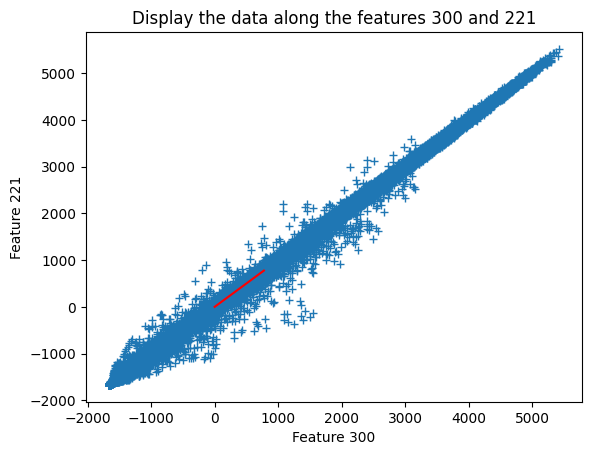

In [11]:
# plot the signal in the first row against 
#signal in the second row

# Choose which features to plot
feature1 = 300
feature2 = 221

plt.plot(X[feature1], X[feature2], '+')
scaled_u = U[:, 0] * -15000
plt.plot([0, scaled_u[feature1]], [0, scaled_u[feature2]], 'r')
plt.xlabel("Feature {}".format(feature1))
plt.ylabel("Feature {}".format(feature2))
plt.title('Display the data along the features {} and {}'.format(feature1, feature2))
plt.show()

In [12]:
# Scalar projection
C = U.T.dot(X)

C_vols = C.T.reshape(vol_shape + (n_vols,))

# break 4D array in 3D
vol0 = C_vols[..., 0]
vol1 = C_vols[..., 1]

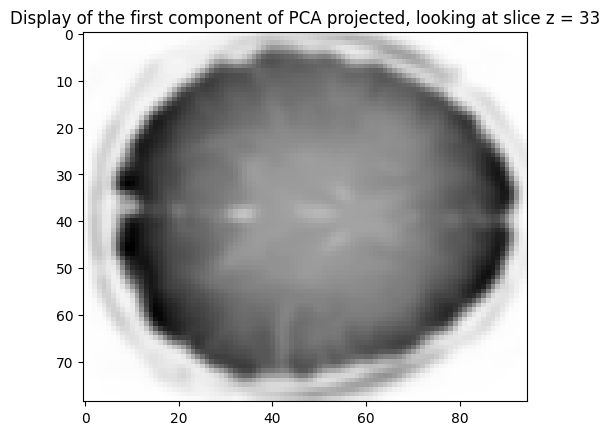

In [13]:
mid_z = int(vol0.shape[2]/2) - 1
plt.imshow(vol0[:, :, mid_z], cmap='gray')
plt.title("Display of the first component of PCA projected, looking at slice z = {}".format(mid_z))
plt.show()

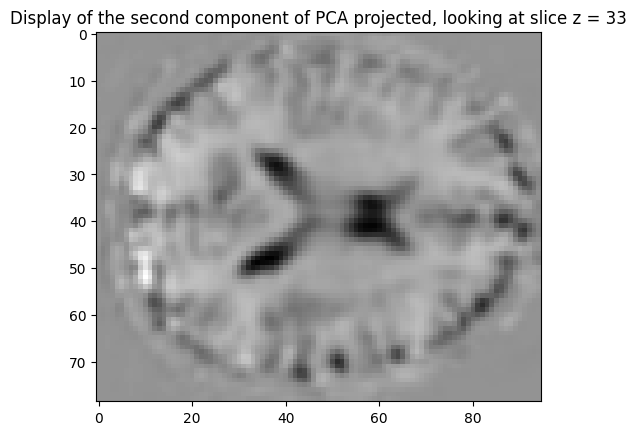

In [14]:
mid_z = int(vol1.shape[2]/2) - 1
plt.imshow(vol1[:, :, mid_z], cmap='gray')
plt.title("Display of the second component of PCA projected, looking at slice z = {}".format(mid_z))
plt.show()

### Spatial & Temporal ICA

Because we have only one stimulus lasting the whole experiment, it probably doesn't make any sense to look at the temporal ICA. (as it used to show when the brain is active or not basically)

### Group ICA

In [15]:
# Load first subject to use as basics for the next part
dataset_fmap = 'ds002322'
subject_fmap = ('18','22','35')

current_directory = os.getcwd()
individual = '18'
img = nib.load(current_directory + '/sub_'+individual +'/derivative/sub-'+individual+'_task-alice_bold_preprocessed.nii.gz')

In [16]:
#find x,y,z shapes on functional data of first subject
affine = img.affine
print(img.shape)
x,y,z,vol = img.shape

N_vol = 372
N_subj = 3
N_tot = N_vol * N_subj

X = np.zeros((N_tot, x*y*z))
i = 0
n_nii = 0
nb_subj_counted = 0
for n_nii in range(N_subj):
    print('Loading subject ', n_nii+1)
    img = nib.load(current_directory + '/sub_'+subject_fmap[n_nii] +'/derivative/sub-'+subject_fmap[n_nii]+'_task-alice_bold_preprocessed.nii.gz')
    data = np.asanyarray(img.dataobj)
    for j in range(N_vol):
        X[i] = data[:, :, :, j].reshape(x*y*z)
        i += 1

print("Finished loading")

X = zscore(X, axis=1)
X = np.nan_to_num(X,0)


(79, 95, 68, 372)
Loading subject  1
Loading subject  2
Loading subject  3
Finished loading


In [24]:
print(img.affine)

[[  -2.    0.    0.   78.]
 [   0.    2.    0. -112.]
 [   0.    0.    2.  -50.]
 [   0.    0.    0.    1.]]


NiftiMasker(mask_img='/Users/marin/nilearn_data/icbm152_2009/mni_icbm152_nlin_sym_09a/mni_icbm152_t1_tal_nlin_sym_09a_mask.nii.gz')


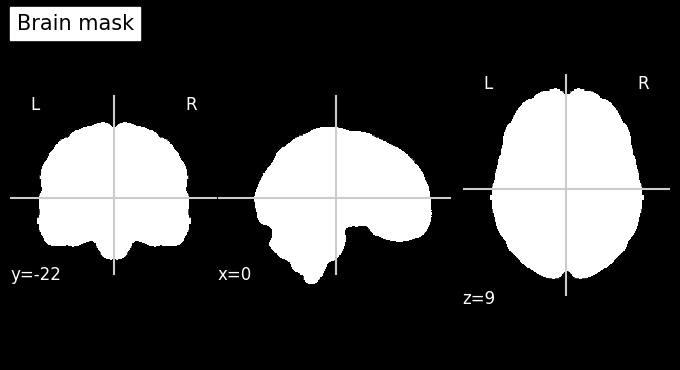

In [22]:
icbms = datasets.fetch_icbm152_2009()
masker = NiftiMasker(mask_img=icbms.mask)
plot_stat_map(icbms.mask, title='Brain mask',black_bg=True, colorbar=False)

In [23]:
test = nib.load(icbms.mask)
print(test.shape)

(197, 233, 189)


In [27]:
S_dict = {}
n_components = [10, 20, 40]

for i in n_components:
    
    n2=2*i
    print('Running PCA with n = %d components'%n2)
    pca = PCA(n_components=n2)
    H = pca.fit_transform(X.T)
    print('Running FastICA with n = %d components'%i)

    ica = FastICA(n_components=i,random_state=1)
    S_ = ica.fit_transform(H)

    S_dict[i]=S_
    print('Done')

Running FastICA with n = 10 components
Done
Running FastICA with n = 20 components
Done
Running FastICA with n = 40 components
Done


In [25]:
# Loading T1 image as a background
T1_img = icbms.t1 

Plotting for n = 10 components


/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine 

Plotting for n = 20 components


/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine 

Plotting for n = 40 components


/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine 

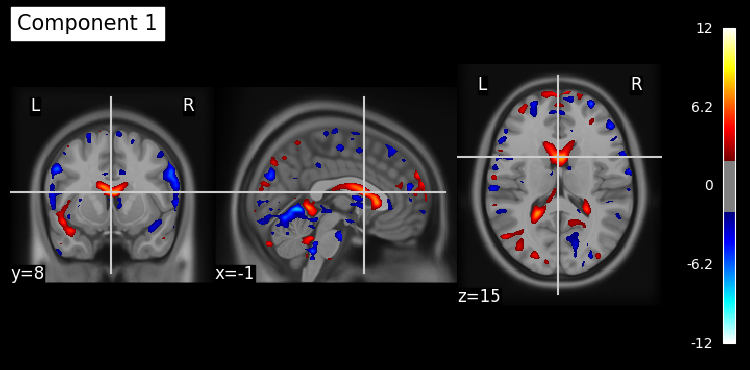

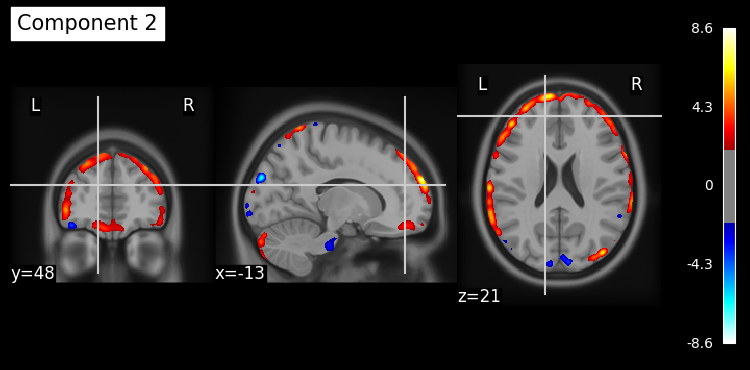

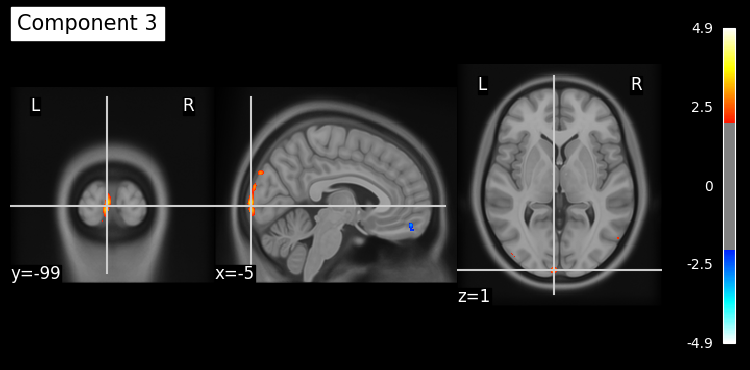

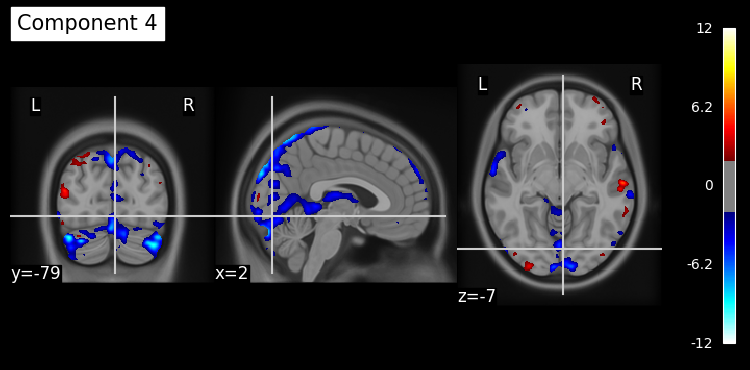

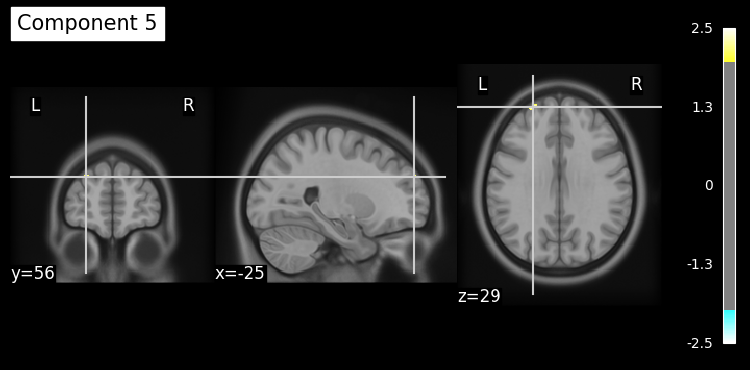

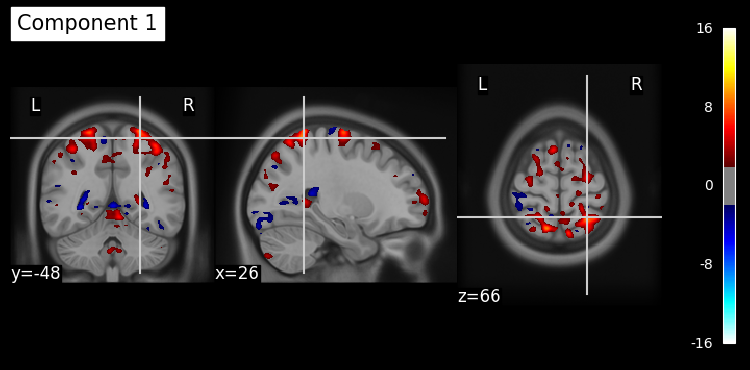

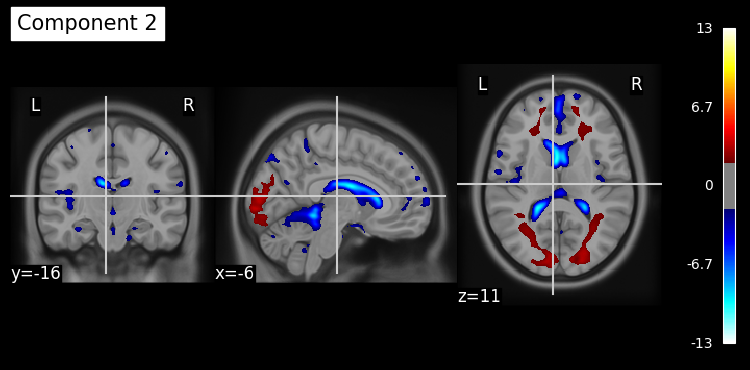

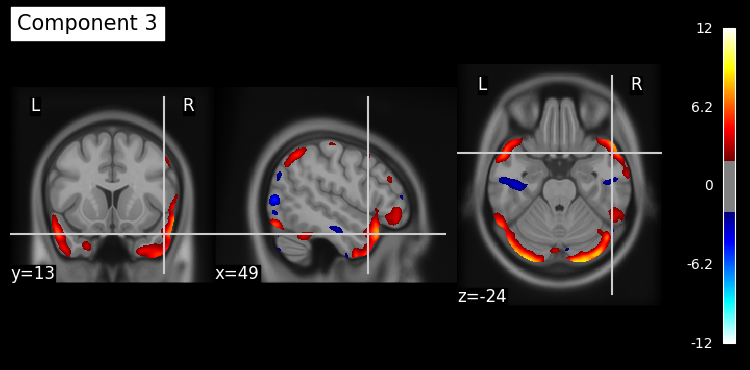

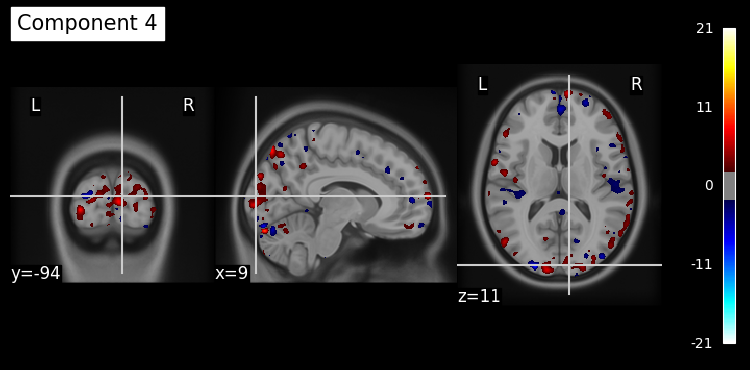

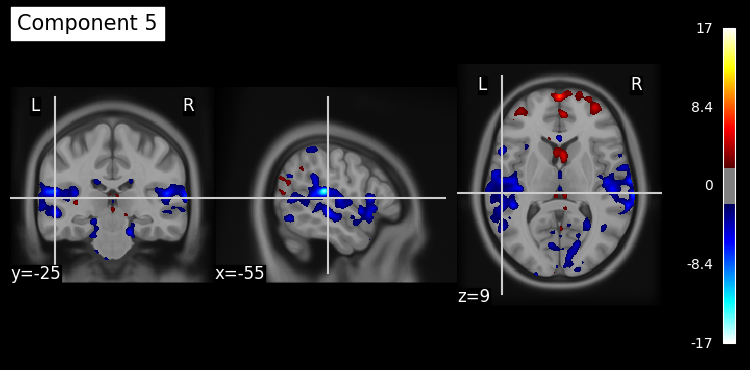

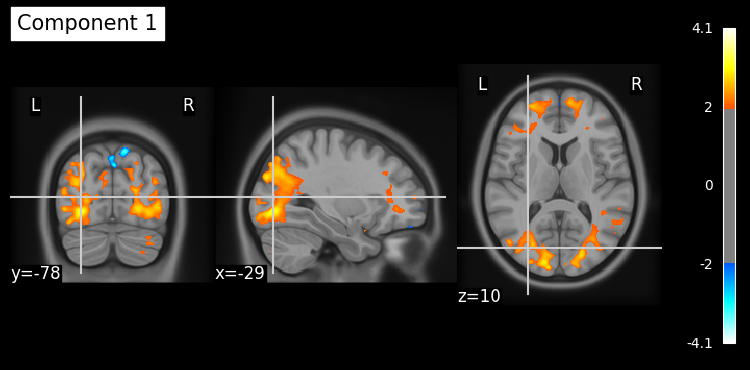

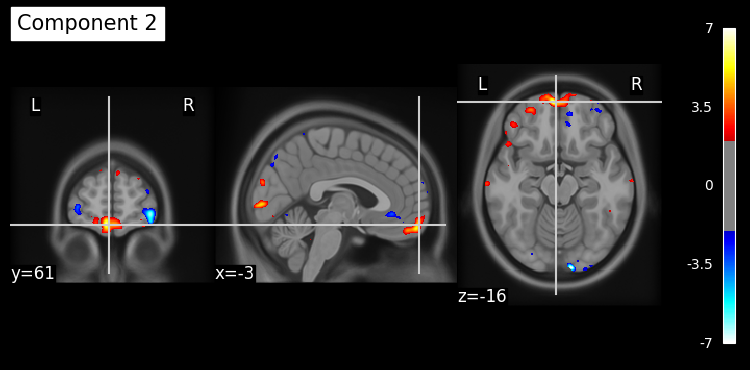

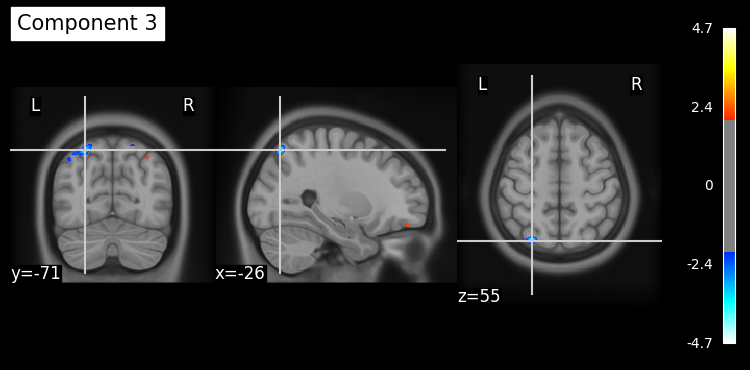

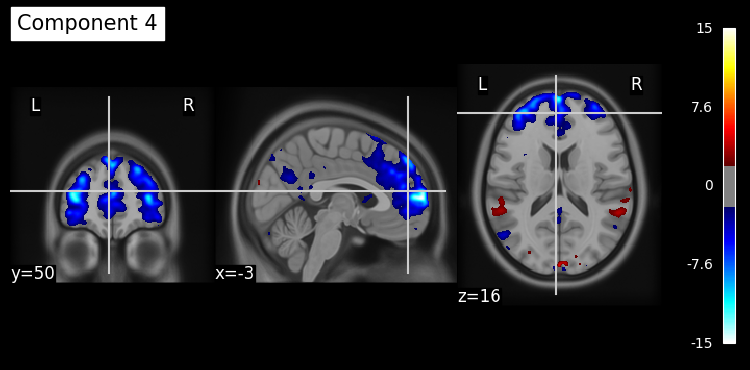

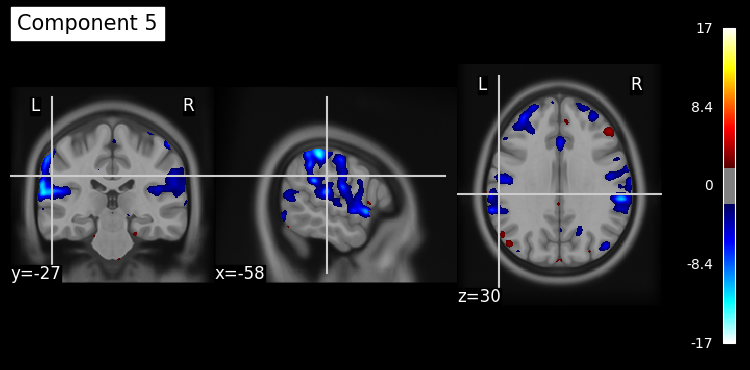

In [28]:
# Plot the ground level components for the different number of components, limited to the first 5 components

for i in n_components:
    print('Plotting for n = %d components'%i)
    S_ = S_dict[i].copy()
    for idx, s in enumerate(S_.T[:(min(5, S_.T.shape[0]))]):
        s_img = nib.Nifti1Image(s.reshape(x,y,z), affine)
        data = masker.fit_transform(s_img)
        masked = masker.inverse_transform(data)
        plot_stat_map(masked, title='Component %d'%(idx+1),black_bg=True, colorbar=True, bg_img=T1_img, display_mode='ortho', threshold=2*np.std(s))

# Seed analysis

In [49]:
# Get data from the first subject
current_directory = os.getcwd()
individual = '18'
img = nib.load(current_directory + '/sub_'+individual +'/derivative/sub-'+individual+'_task-alice_bold_preprocessed.nii.gz')
data = np.asanyarray(img.dataobj)
print(data.shape)

(79, 95, 68, 372)


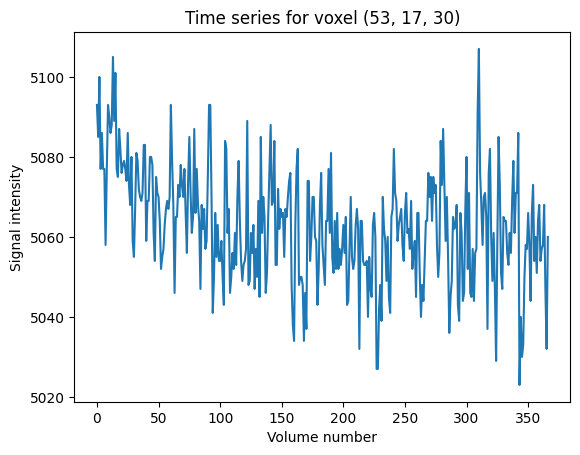

In [56]:
# Remove first 5 volumes because they are some weird artifacts
data = data[..., 5:]

# Choose one voxel
voxel_x = 53
voxel_y = 17
voxel_z = 30
voxel_time_series = data[voxel_x, voxel_y, voxel_z, :]

plt.plot(voxel_time_series)
plt.xlabel("Volume number")
plt.ylabel("Signal intensity")
plt.title("Time series for voxel ({}, {}, {})".format(voxel_x, voxel_y, voxel_z))
plt.show()

In [57]:
pearson_coeffs = np.zeros(data.shape[:-1])

# Go through all the voxels and compute the Pearson correlation coefficient
for x in range(data.shape[0]):
    for y in range(data.shape[1]):
        for z in range(data.shape[2]):
            pearson_coeffs[x, y, z] = np.corrcoef(voxel_time_series, data[x, y, z, :])[0, 1]

/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/maskers/nifti_masker.py:108: UserWarning: imgs are being resampled to the mask_img resolution. This process is memory intensive. You might want to provide a target_affine that is equal to the affine of the imgs or resample the mask beforehand to save memory and computation time.
  warnings.warn(
/Users/marin/anaconda3/envs/NSSP/lib/python3.9/site-packages/nilearn/image/resampling.py:663: RuntimeWarning: NaNs or infinite values are present in the data passed to resample. This is a bad thing as they make resampling ill-defined and much slower.
  _resample_one_img(


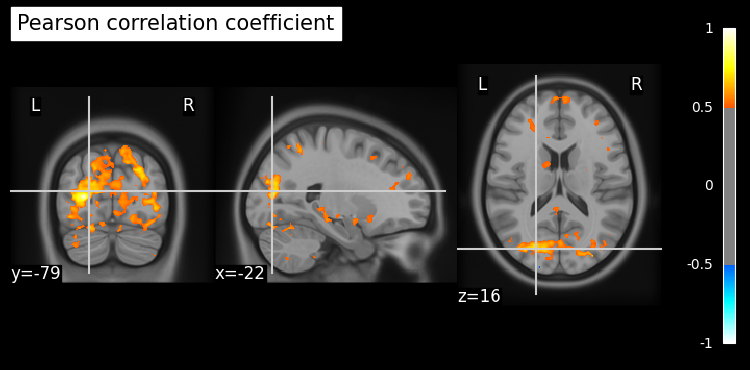

In [58]:
s_img = nib.Nifti1Image(pearson_coeffs, affine)
data_to_show = masker.fit_transform(s_img)
masked = masker.inverse_transform(data_to_show)
plot_stat_map(masked, title='Pearson correlation coefficient',black_bg=True, colorbar=True, bg_img=T1_img, display_mode='ortho', threshold=0.5)

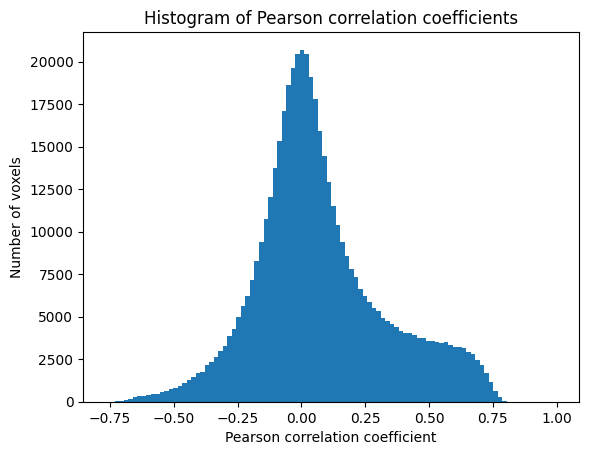

In [39]:
# Plot the histogram of the Pearson correlation coefficients
plt.hist(pearson_coeffs, bins=100)
plt.xlabel("Pearson correlation coefficient")
plt.ylabel("Number of voxels")
plt.title("Histogram of Pearson correlation coefficients")
plt.show()